# K-Means Clustering

In K-Means Clustering we have to choose the value of 'K' very accurately by looking at the Within Sum of Squares (WSS).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Europe_Countries.csv')
df.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [8]:
df.shape

(28, 8)

The data set imported in the last cell is an economic dataset. This data set contains various economic factors for European Countries. All the variables are kind of self-explanatory.

Let us go ahead and create a new dataframe with only the relevant variables for Clustering.

In [9]:
data = df.iloc[:,1:8]
data.head()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


Since we have seen how to scale the data using the StandardScaler function from sklearn in the codebook of Hierarchical clustering, we will go ahead and do the same for this particular data set as well.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Let us check the scaled data.

data_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
data_scaled.head()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973
3,-0.675636,-0.973310,-0.759511,-0.680942,0.996208,-0.420236,1.693357
4,-0.538618,-0.334301,-1.050830,-0.237093,-0.579571,-0.501385,-0.309438


Now that we have scaled the data, let us go ahead and perform the K-Means Clustering.

Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).

In [12]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [13]:
clust_2 = k_means.fit_predict(data_scaled)
clust_2

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0])

In [14]:
k_means.inertia_

132.62749228525956

The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.

Let us now check the WSS for 3 clusters.

In [15]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

106.58089282172553

Now, we see that the WSS is decreasing. But it is very cumbersome to manually compute for each value. So, we are going to pass the KMeans function through a loop to automate this process of manually calculating the 'inertia'.

Let us define an empty list to being the process of automating the calculation of 'inertia'.

In [16]:
wss =[] 

Now, let us create the loop.

In [17]:
for i in range(2,9): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i,random_state=1) #we are defining the number of clusters which is the same as 'i'
    KM.fit(data_scaled) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss.append(KM.inertia_) # we are adding all the values of 'inertia' into the empty list called wss
    
#In short, we are calculating the value of 'inertia' in every step and storing the same in 'wss'

Now, let us print 'wss' and check the values.

In [18]:
# The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(2,9):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 132.62749228525956
The WSS value for 3 clusters is 106.58089282172553
The WSS value for 4 clusters is 85.97399272474252
The WSS value for 5 clusters is 73.60324865759934
The WSS value for 6 clusters is 62.86475996861873
The WSS value for 7 clusters is 54.159482283003705
The WSS value for 8 clusters is 43.56478607045958


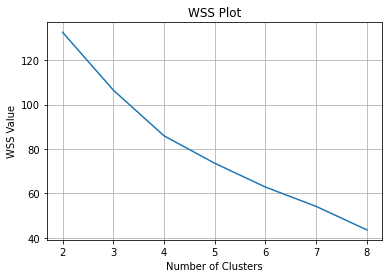

In [19]:
plt.plot(range(2,9), wss)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

The ideal 'WSS' plot has to have a sharp elbow like structure. The number of clusters corresponding to that elbow-like graph is considered to be the most optimum.

Having said that, here we will go for 4 clusters.

Let us now store the values of the clusters into a variable and we will attach the particular variable to the data set.

In [20]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data_scaled)
labels = k_means.labels_
labels

array([2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 3, 0])

In [21]:
df["Clus_kmeans"] = labels
df.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Clus_kmeans
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2,2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2,2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6,1
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7,1
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5,2


Now that we have created a new column of clusters, let us export this into a .csv file.

In [22]:
df.to_csv('KMeans.csv')

Now, let us compare the different clusters with the average values and try to interpret the problem.

In [23]:
df1 = df.drop(['Country'],axis=1)
df_clust = df1.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
df_clust

,Clus_kmeans,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,0,359940.571429,37957.142857,2.942857,80.628571,1.800000,0.278571,8.971429
1,1,94696.181818,20881.818182,3.709091,75.947273,2.001818,-0.230000,13.309091
2,2,55004.333333,43277.777778,2.688889,79.874444,0.994444,0.498889,6.744444
3,3,603550.000000,7200.000000,8.000000,68.740000,1.400000,-0.630000,7.900000


Let us check the frequency of the occurence of the clusters for each individual cluster.

In [24]:
cluster_freq = df['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0     7
1    11
2     9
3     1
Name: Clus_kmeans, dtype: int64

In [25]:
df_clust['Frequency'] = cluster_freq.values
df_clust

,Clus_kmeans,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Frequency
0,0,359940.571429,37957.142857,2.942857,80.628571,1.800000,0.278571,8.971429,7
1,1,94696.181818,20881.818182,3.709091,75.947273,2.001818,-0.230000,13.309091,11
2,2,55004.333333,43277.777778,2.688889,79.874444,0.994444,0.498889,6.744444,9
3,3,603550.000000,7200.000000,8.000000,68.740000,1.400000,-0.630000,7.900000,1


# END